'''
Project Name = Airline Data Analysis
=============
Created BY = Prakhar Tripathi & IShita Mishra
============
Project Description = This is a data analysis project that is done by using MySQL and Python, in this analysis we have to
solve the business problem of the airlines, and also for solving it we have to find some insights.

Business Problem = There is a company that operates a diverse fleet of aircraft ranging from small business jets to
medium-sized machines. However, They are currently facing challenges due to several factors such as stricter
environmental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor
market resulting in increased labor costs.

As a result, the company's profitability is under pressure, and they are seeking ways to address this issue. To tackle
this challenge, they are looking to conduct an analysis of their database to find ways to increase their occupancy
rate, which can help boost the average profit earned per seat.

Main Goal of the analysis.....
================================
1. Enhancing the occupancy of flight.
2. Maintain the pricing.
3. Enhancing the customer experience.

The main goal is to find the way to make the airline more profitable and also resolving the issues like occupancy rate
pricing and customer satisfaction.
'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sqlite3

In [4]:
conn = sqlite3.connect("C:\\Users\\ishita mishra\\Desktop\\Travel Project\\travel.sqlite")
cur = conn.cursor()

cur.execute('select name from sqlite_master where type = "table";')
print("list of tables...")

t_list = [table[0] for table in cur.fetchall()]
t_list

list of tables...


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration / Data Pre processing

## Checking the Column


In [7]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", conn)
aircrafts_data.columns
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [9]:
airports_data = pd.read_sql_query("select * from airports_data", conn)
airports_data.columns
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [13]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", conn)
boarding_passes.columns
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [15]:
bookings = pd.read_sql_query("select * from bookings", conn)
bookings.columns
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [17]:
flights = pd.read_sql_query("select * from flights", conn)
flights.columns
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [19]:
seats = pd.read_sql_query("select * from seats", conn)
seats.columns
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [21]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", conn)
ticket_flights.columns
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [24]:
tickets = pd.read_sql_query("select * from tickets", conn)
tickets.columns
# tickets.head()

Index(['ticket_no', 'book_ref', 'passenger_id'], dtype='object')

## Checking the Null Values

In [35]:

for table in t_list:
    print("\n table: ",table)
    df_table = pd.read_sql_query(f"select * from {table}", conn)
    print(df_table.isnull().sum())


 table:  aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

 table:  airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

 table:  boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

 table:  bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

 table:  flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

 table:  seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

 table:  ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

 table:  tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Exploratory Data Analysis

## Q. Planes that have more than 100 seats

In [40]:
seat_count = pd.read_sql_query("select aircraft_code, count(*) as Total_Seats from seats group by aircraft_code having count(*) > 100 order by Total_Seats desc", conn)
seat_count

,aircraft_code,Total_Seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


## Q. Checking the flight status count and also checking the aircraft which has maximum cancellation.


In [29]:
flight = pd.read_sql_query(f"SELECT status from flights", conn)
flight.value_counts()

status   
Arrived      16707
Scheduled    15383
On Time        518
Cancelled      414
Departed        58
Delayed         41
Name: count, dtype: int64

In [30]:
Cancelled_aircraft = pd.read_sql_query("select aircraft_code,count(status) as seat_count from flights where status == 'Cancelled'", conn)
Cancelled_aircraft

,aircraft_code,seat_count
0,CN1,414


In [31]:
cancel_airport = pd.read_sql_query("SELECT departure_airport from flights where status == 'Cancelled'",conn)
cancel_airport.value_counts()

departure_airport
DME                  31
SVO                  26
VKO                  20
LED                  15
OVB                  10
                     ..
MMK                   1
SLY                   1
NYA                   1
OGZ                   1
AAQ                   1
Name: count, Length: 100, dtype: int64

## Q. Maximum Bookings with respect to Month


In [32]:
booking = pd.read_sql_query("select * from bookings",conn)
booking

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [34]:
booking['book_date'] = pd.to_datetime(booking['book_date'])
booking['month'] = booking['book_date'].dt.month_name()
month_count = booking['month'].value_counts()
month_count

month
July      167062
August     88423
June        7303
Name: count, dtype: int64

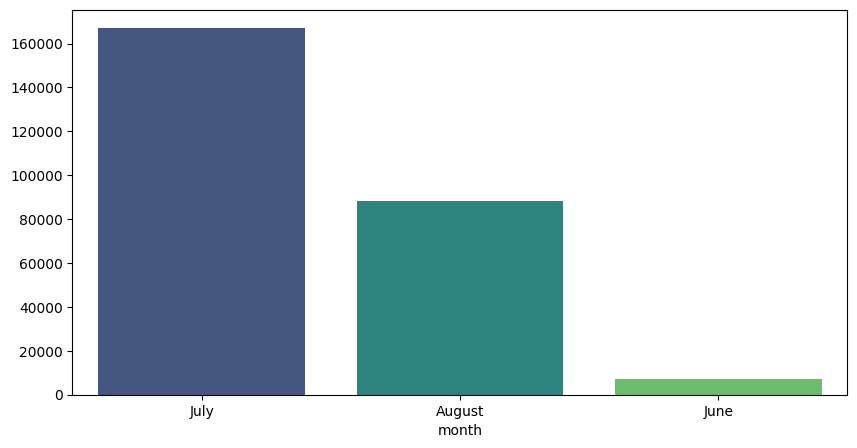

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x=month_count.index , y=month_count.values, palette='viridis')
plt.show()

## Q. Maximum bookings per day

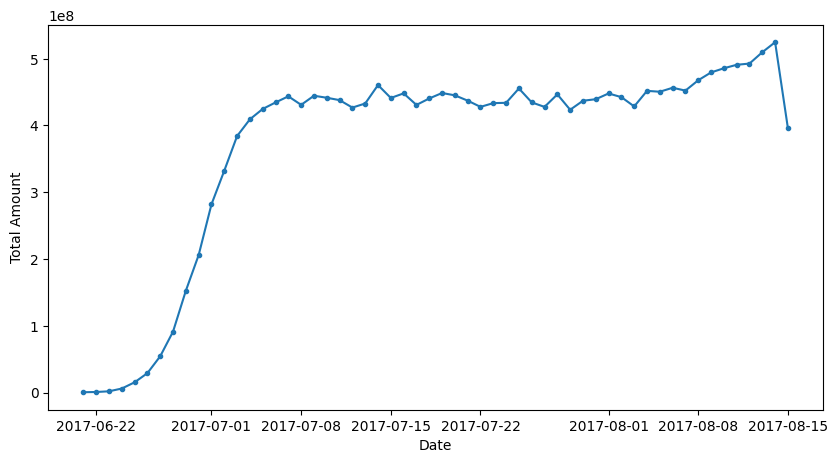

In [38]:
booking['Date'] = booking['book_date'].dt.date
booking_amount = booking.groupby('Date')[['total_amount']].sum()

plt.figure(figsize=(10,5))
plt.plot(booking_amount.index, booking_amount['total_amount'], marker = '.')
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.show()

## Count the fare conditions on which passengers use most

In [41]:
fare_count = pd.read_sql_query("select fare_conditions from ticket_flights", conn)
print(fare_count.value_counts())

df = pd.read_sql_query("SELECT fare_conditions, aircraft_code, avg(amount) as Average_Amount from ticket_flights "
                       "join flights on ticket_flights.flight_id = flights.flight_id "
                       "group by aircraft_code, fare_conditions",conn)
df

fare_conditions
Economy            920793
Business           107642
Comfort             17291
Name: count, dtype: int64


,fare_conditions,aircraft_code,Average_Amount
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


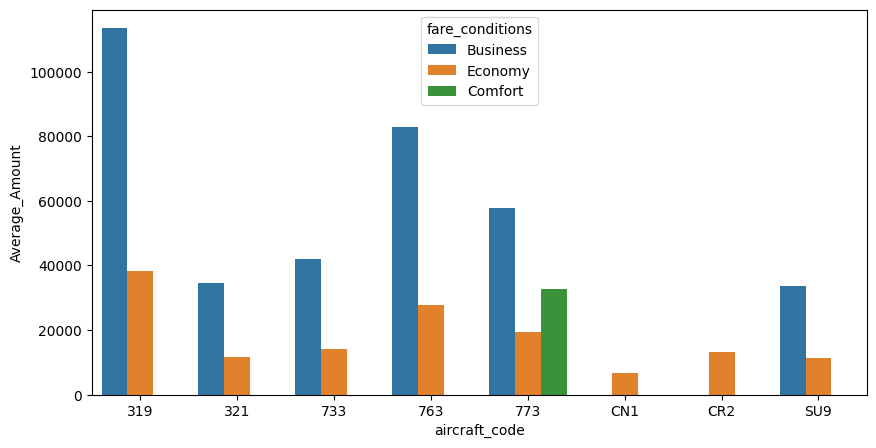

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(data= df, x="aircraft_code", y="Average_Amount", hue="fare_conditions")
plt.show()

## Q. For each aircraft, calculate the total revenue and average revenue per ticket

In [48]:
average_revenue_per_ticket = pd.read_sql_query("select aircraft_code,Ticket_Count, Total_Revenue, Total_Revenue/Ticket_Count as Average_Revenue from (select aircraft_code, count(*) as Ticket_Count, sum(amount) as Total_Revenue from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code) "
,conn)
average_revenue_per_ticket

,aircraft_code,Ticket_Count,Total_Revenue,Average_Revenue
0,CN1,14672,96373800,6568
1,733,86102,1426552100,16568
2,321,107129,1638164100,15291
3,CR2,150122,1982760500,13207
4,319,52853,2706163100,51201
5,773,144376,3431205500,23765
6,763,124774,4371277100,35033
7,SU9,365698,5114484700,13985
